In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('customer_data.csv')  # Replace with your dataset path
print(data.head())

# Select features for clustering
features = data[['Age', 'Annual Income', 'Spending Score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate the WCSS (Within-Cluster Sum of Squares) for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Choose optimal K (for example, K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
data['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Spending Score', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


   CustomerID  Age  Annual Income  Spending Score
0           1   25          50000              50
1           2   45          60000              60
2           3   35          75000              90
3           4   30          80000              85
4           5   40         120000              40


ValueError: n_samples=5 should be >= n_clusters=6.

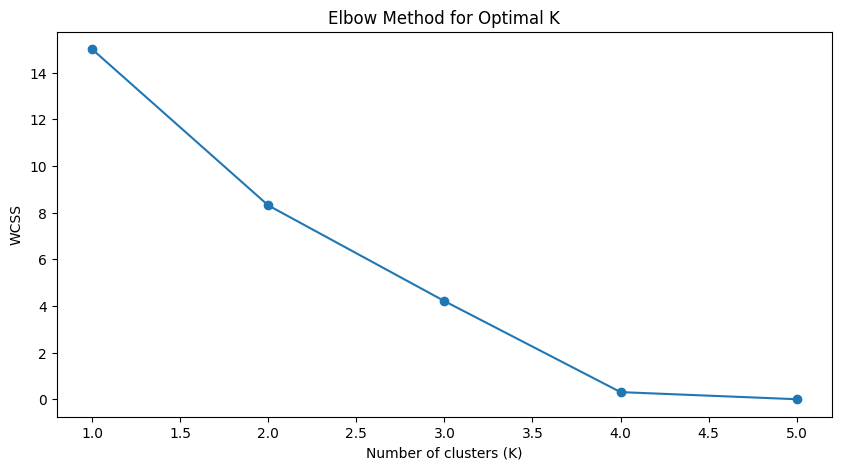

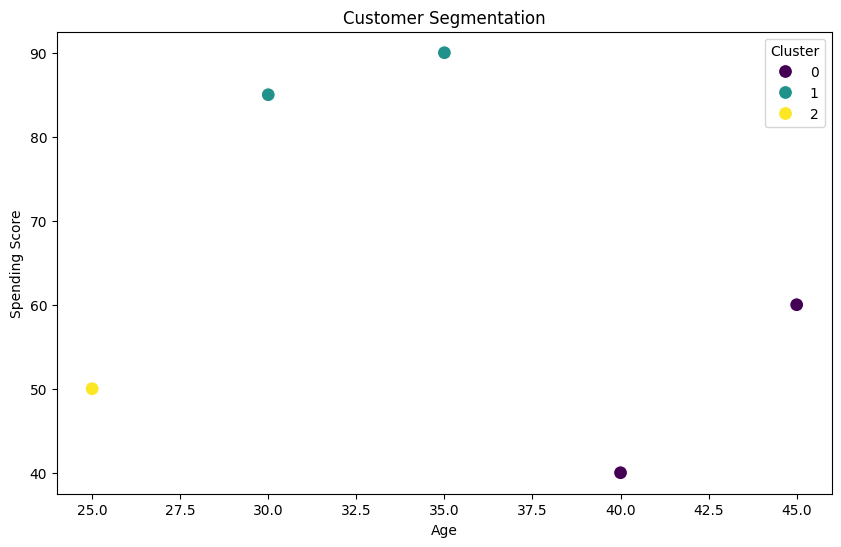

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 45, 35, 30, 40],
    'Annual Income': [50000, 60000, 75000, 80000, 120000],
    'Spending Score': [50, 60, 90, 85, 40]
})

# Select features for clustering
features = data[['Age', 'Annual Income', 'Spending Score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate the WCSS (Within-Cluster Sum of Squares) for different values of K
wcss = []
n_samples = features.shape[0]  # Number of samples

# Set the max clusters to the number of samples
max_k = min(10, n_samples)

for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Choose optimal K (for example, K=3) - make sure K <= n_samples
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
data['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Spending Score', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


   Feature1  Feature2  Cluster
0         1         1        1
1         2         2        1
2         2         0        1
3         8         8        0
4         7        10        0
5         9        10        0
6         1         4        1
7         0         5        1
8         5         8        0
9         6         7        0


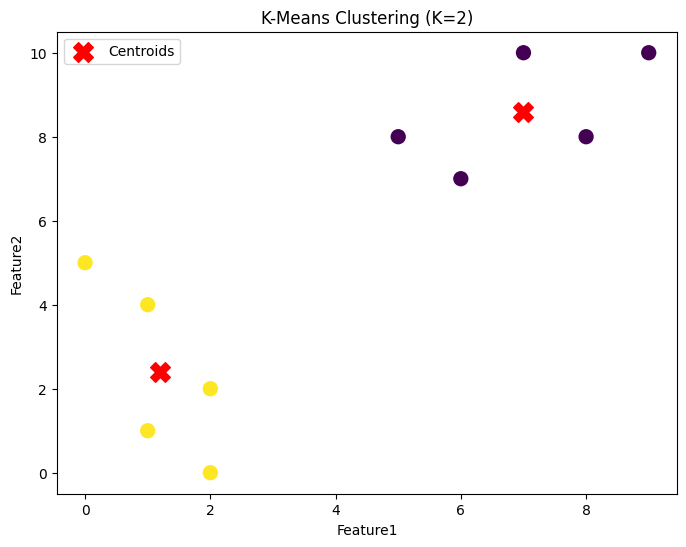

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data
data = pd.DataFrame({
    'Feature1': [1, 2, 2, 8, 7, 9, 1, 0, 5, 6],
    'Feature2': [1, 2, 0, 8, 10, 10, 4, 5, 8, 7]
})

# Create a K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels for each data point
data['Cluster'] = kmeans.labels_

# Display the data with cluster labels
print(data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], cmap='viridis', s=100, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (K=2)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()


In [ ]:
#above output explation
# Explanation of the Output
# Cluster Labels: Each data point is assigned a cluster label (0 or 1) based on which cluster it belongs to.
# Scatter Plot: The data points are plotted and color-coded by their cluster label. The centroids of the clusters are marked with red 'X' symbols.
# Centroids: The red 'X' markers represent the centroids of the clusters. The algorithm calculates these points to minimize the distance between points within each cluster.
# This simple example helps visualize how K-Means works and groups the data points into clusters. You can adjust the number of clusters to see how it affects the grouping.